In [1]:
import tabula
from tabula import read_pdf
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df=read_pdf("Drava.pdf", pages=(1,2,3,4,5,6,7,8))
df

[                       Unnamed: 0 Unnamed: 1 13.01.2014 27.02.2014 18.03.2014  \
 0               MERITVE NA TERENU        NaN        NaN        NaN        NaN   
 1               Temperatura zraka         0C          6          8         18   
 2                Temperatura vode         0C        5,2        6,8         10   
 3                              pH          -        8,4        8,1        8,2   
 4   Električna prevodnost (25 0C)      μS/cm        303        299        324   
 5                     Kisik sonda    mg O2/l        8,7       10,5        9,4   
 6    Nasičenost s kisikom - sonda          %         72         91         86   
 7               OSNOVNI PARAMETRI        NaN        NaN        NaN        NaN   
 8   Suspendirane snovi po sušenju       mg/l        NaN        NaN        NaN   
 9                     KPK s KMnO4    mg O2/l        NaN        NaN        NaN   
 10                  KPK s K2Cr2O7    mg O2/l        NaN        NaN        NaN   
 11             

Table is a mess....Try to convert two parts separately and then to merge them.

In [4]:
#convert first 4 pages of pdf document into csv file:
#read csv file:

table_1 = tabula.convert_into("Drava.pdf", "Drava_1.csv", pages=(1,2,3,4))
df1=pd.read_csv("Drava_1.csv", encoding='latin-1', delimiter=",", decimal=",")
df1

,Unnamed: 0,Unnamed: 1,13.01.2014,27.02.2014,18.03.2014,14.04.2014,22.05.2014,17.06.2014
0,MERITVE NA TERENU,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Temperatura zraka,0C,6,8,18,17,20,18
2,Temperatura vode,0C,"5,2","6,8",10,"11,7","14,6",17
3,pH,-,"8,4","8,1","8,2",8,"7,9",8
4,Elektrièna prevodnost (25 0C),?S/cm,303,299,324,253,246,192
...,...,...,...,...,...,...,...,...
88,Vanadij-filt.,?g/l,<1,<1,<1,<1,<1,<1
89,ivo srebro-filt.,?g/l,"0,012",<0.01,"0,031",<0.01,<0.01,<0.01
90,ivo srebro-sed.,mg/kg,NaN,NaN,NaN,NaN,NaN,NaN
91,ivo srebro-org. (mokra tea),?g/kg,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#convert second 4 pages of pdf document into csv file:
#read csv file:

table_2 = tabula.convert_into("Drava.pdf", "Drava_2.csv", pages=(5,6,7,8))
df2 = pd.read_csv("Drava_2.csv", encoding='latin-1',delimiter=",", decimal=",")
df2

,Unnamed: 0,Unnamed: 1,17.07.2014,26.08.2014,24.09.2014,14.10.2014,24.11.2014,22.12.2014
0,MERITVE NA TERENU,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Temperatura zraka,0C,22,18,8,15,3,3
2,Temperatura vode,0C,"18,5","15,4","13,4","14,9","6,9","4,6"
3,pH,-,"7,9",8,"7,9","7,8","8,2","8,4"
4,Elektrièna prevodnost (25 0C),?S/cm,233,261,256,304,261,302
...,...,...,...,...,...,...,...,...
88,Vanadij-filt.,?g/l,<1,<1,<1,"1,1",<1,<1
89,ivo srebro-filt.,?g/l,<0.01,<0.01,<0.01,<0.01,<0.01,<0.01
90,ivo srebro-sed.,mg/kg,NaN,NaN,NaN,NaN,NaN,NaN
91,ivo srebro-org. (mokra tea),?g/kg,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#merge two tables into one data frame:

df3=pd.merge(df1, df2)
df3.head()

,Unnamed: 0,Unnamed: 1,13.01.2014,27.02.2014,18.03.2014,14.04.2014,22.05.2014,17.06.2014,17.07.2014,26.08.2014,24.09.2014,14.10.2014,24.11.2014,22.12.2014
0,MERITVE NA TERENU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Temperatura zraka,0C,6,8,18,17,20,18,22,18,8,15,3,3
2,Temperatura vode,0C,"5,2","6,8",10,"11,7","14,6",17,"18,5","15,4","13,4","14,9","6,9","4,6"
3,pH,-,"8,4","8,1","8,2",8,"7,9",8,"7,9",8,"7,9","7,8","8,2","8,4"
4,Elektrièna prevodnost (25 0C),?S/cm,303,299,324,253,246,192,233,261,256,304,261,302


In [7]:
#merge first two columnes into one:

df3["Parameter"]=df3["Unnamed: 0"]+df3["Unnamed: 1"]
df3.head()

,Unnamed: 0,Unnamed: 1,13.01.2014,27.02.2014,18.03.2014,14.04.2014,22.05.2014,17.06.2014,17.07.2014,26.08.2014,24.09.2014,14.10.2014,24.11.2014,22.12.2014,Parameter
0,MERITVE NA TERENU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Temperatura zraka,0C,6,8,18,17,20,18,22,18,8,15,3,3,Temperatura zraka0C
2,Temperatura vode,0C,"5,2","6,8",10,"11,7","14,6",17,"18,5","15,4","13,4","14,9","6,9","4,6",Temperatura vode0C
3,pH,-,"8,4","8,1","8,2",8,"7,9",8,"7,9",8,"7,9","7,8","8,2","8,4",pH-
4,Elektrièna prevodnost (25 0C),?S/cm,303,299,324,253,246,192,233,261,256,304,261,302,Elektrièna prevodnost (25 0C)?S/cm


In [8]:
#delete first two columnes:

df3.drop(["Unnamed: 0","Unnamed: 1"], axis=1)

,13.01.2014,27.02.2014,18.03.2014,14.04.2014,22.05.2014,17.06.2014,17.07.2014,26.08.2014,24.09.2014,14.10.2014,24.11.2014,22.12.2014,Parameter
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,8,18,17,20,18,22,18,8,15,3,3,Temperatura zraka0C
2,"5,2","6,8",10,"11,7","14,6",17,"18,5","15,4","13,4","14,9","6,9","4,6",Temperatura vode0C
3,"8,4","8,1","8,2",8,"7,9",8,"7,9",8,"7,9","7,8","8,2","8,4",pH-
4,303,299,324,253,246,192,233,261,256,304,261,302,Elektrièna prevodnost (25 0C)?S/cm
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,<1,<1,<1,<1,<1,<1,<1,<1,<1,"1,1",<1,<1,Vanadij-filt.?g/l
89,"0,012",<0.01,"0,031",<0.01,<0.01,<0.01,<0.01,<0.01,<0.01,<0.01,<0.01,<0.01,ivo srebro-filt.?g/l
90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ivo srebro-sed.mg/kg
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ivo srebro-org. (mokra tea)?g/kg


In [9]:
#change order of the columns:

df3= df3[["Parameter","13.01.2014","27.02.2014","18.03.2014","14.04.2014","22.05.2014","17.06.2014","26.08.2014","24.09.2014","14.10.2014","24.11.2014","22.12.2014"]]
df3.head()

,Parameter,13.01.2014,27.02.2014,18.03.2014,14.04.2014,22.05.2014,17.06.2014,26.08.2014,24.09.2014,14.10.2014,24.11.2014,22.12.2014
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Temperatura zraka0C,6,8,18,17,20,18,18,8,15,3,3
2,Temperatura vode0C,"5,2","6,8",10,"11,7","14,6",17,"15,4","13,4","14,9","6,9","4,6"
3,pH-,"8,4","8,1","8,2",8,"7,9",8,8,"7,9","7,8","8,2","8,4"
4,Elektrièna prevodnost (25 0C)?S/cm,303,299,324,253,246,192,261,256,304,261,302


In [10]:
#replace NaN values with 0:

df3=df3.fillna(0)
df3.head()

,Parameter,13.01.2014,27.02.2014,18.03.2014,14.04.2014,22.05.2014,17.06.2014,26.08.2014,24.09.2014,14.10.2014,24.11.2014,22.12.2014
0,0,0,0,0,0,0,0,0,0,0,0,0
1,Temperatura zraka0C,6,8,18,17,20,18,18,8,15,3,3
2,Temperatura vode0C,"5,2","6,8",10,"11,7","14,6",17,"15,4","13,4","14,9","6,9","4,6"
3,pH-,"8,4","8,1","8,2",8,"7,9",8,8,"7,9","7,8","8,2","8,4"
4,Elektrièna prevodnost (25 0C)?S/cm,303,299,324,253,246,192,261,256,304,261,302


In [11]:
#delete rows where "Parameter" is equal to 0:

df3.drop(df3[df3['Parameter'] == 0].index, inplace = True)
df3.head()

,Parameter,13.01.2014,27.02.2014,18.03.2014,14.04.2014,22.05.2014,17.06.2014,26.08.2014,24.09.2014,14.10.2014,24.11.2014,22.12.2014
1,Temperatura zraka0C,6,8,18,17,20,18,18,8,15,3,3
2,Temperatura vode0C,"5,2","6,8",10,"11,7","14,6",17,"15,4","13,4","14,9","6,9","4,6"
3,pH-,"8,4","8,1","8,2",8,"7,9",8,8,"7,9","7,8","8,2","8,4"
4,Elektrièna prevodnost (25 0C)?S/cm,303,299,324,253,246,192,261,256,304,261,302
5,Kisik sondamg O2/l,"8,7","10,5","9,4","9,6","9,8","9,5","9,5","7,8",10,"11,7","10,1"


In [12]:
#check the index column name:

print(df3.index.name)

None


In [13]:
#set index and transpose dataframe:

df3.set_index("Parameter",inplace=True)
df3 = df3.transpose()
df3.head()

Parameter,Temperatura zraka0C,Temperatura vode0C,pH-,Elektrièna prevodnost (25 0C)?S/cm,Kisik sondamg O2/l,Nasièenost s kisikom - sonda%,Suspendirane snovi po suenjumg/l,KPK s KMnO4mg O2/l,KPK s K2Cr2O7mg O2/l,BPK5mg O2/l,...,Selen-filt.?g/l,Srebro-filt.?g/l,Svinec-filt.?g/l,Svinec-sed.mg/kg,Svinec-org. (mokra tea)?g/kg,Vanadij-filt.?g/l,ivo srebro-filt.?g/l,ivo srebro-sed.mg/kg,ivo srebro-org. (mokra tea)?g/kg,Titan-filt.?g/l
13.01.2014,6,"5,2","8,4",303,"8,7",72,0,0,0,0,...,<1,"1,9",<1,0,0,<1,"0,012",0,0,<1
27.02.2014,8,"6,8","8,1",299,"10,5",91,0,0,0,0,...,<1,<1,<1,0,0,<1,<0.01,0,0,<1
18.03.2014,18,10,"8,2",324,"9,4",86,0,0,0,0,...,<1,<1,<1,0,0,<1,"0,031",0,0,<1
14.04.2014,17,"11,7",8,253,"9,6",92,0,0,0,0,...,<1,<1,<1,0,0,<1,<0.01,0,0,<1
22.05.2014,20,"14,6","7,9",246,"9,8",100,0,0,0,0,...,<1,<1,<1,0,0,<1,<0.01,0,0,"1,1"


In [14]:
df3.reset_index()

Parameter,index,Temperatura zraka0C,Temperatura vode0C,pH-,Elektrièna prevodnost (25 0C)?S/cm,Kisik sondamg O2/l,Nasièenost s kisikom - sonda%,Suspendirane snovi po suenjumg/l,KPK s KMnO4mg O2/l,KPK s K2Cr2O7mg O2/l,...,Selen-filt.?g/l,Srebro-filt.?g/l,Svinec-filt.?g/l,Svinec-sed.mg/kg,Svinec-org. (mokra tea)?g/kg,Vanadij-filt.?g/l,ivo srebro-filt.?g/l,ivo srebro-sed.mg/kg,ivo srebro-org. (mokra tea)?g/kg,Titan-filt.?g/l
0,13.01.2014,6,"5,2","8,4",303,"8,7",72,0,0,0,...,<1,"1,9",<1,0,0,<1,"0,012",0,0,<1
1,27.02.2014,8,"6,8","8,1",299,"10,5",91,0,0,0,...,<1,<1,<1,0,0,<1,<0.01,0,0,<1
2,18.03.2014,18,10,"8,2",324,"9,4",86,0,0,0,...,<1,<1,<1,0,0,<1,"0,031",0,0,<1
3,14.04.2014,17,"11,7",8,253,"9,6",92,0,0,0,...,<1,<1,<1,0,0,<1,<0.01,0,0,<1
4,22.05.2014,20,"14,6","7,9",246,"9,8",100,0,0,0,...,<1,<1,<1,0,0,<1,<0.01,0,0,"1,1"
5,17.06.2014,18,17,8,192,"9,5",100,0,0,0,...,<1,<1,<1,0,0,<1,<0.01,0,0,1
6,26.08.2014,18,"15,4",8,261,"9,5",98,0,0,0,...,<1,<1,<1,0,0,<1,<0.01,0,0,<1
7,24.09.2014,8,"13,4","7,9",256,"7,8",76,0,0,0,...,<1,<1,<1,0,0,<1,<0.01,0,0,"1,6"
8,14.10.2014,15,"14,9","7,8",304,10,103,0,0,0,...,<1,<1,<1,0,0,"1,1",<0.01,0,0,<1
9,24.11.2014,3,"6,9","8,2",261,"11,7",97,0,0,0,...,<1,<1,<1,0,0,<1,<0.01,0,0,"1,2"


In [15]:
#Check if all headers are displayed:

for col in df3.columns: 
    print(col) 

Temperatura zraka0C
Temperatura vode0C
pH-
Elektrièna prevodnost (25 0C)?S/cm
Kisik sondamg O2/l
Nasièenost s kisikom - sonda%
Suspendirane snovi po suenjumg/l
KPK s KMnO4mg O2/l
KPK s K2Cr2O7mg O2/l
BPK5mg O2/l
TOCmg C/l
DOCmg C/l
Skupni duik TNmg N/l
Amoniak (prosti)mg NH3/l
Amonijmg NH4/l
Nitritimg NO2/l
Nitratimg NO3/l
Sulfatimg/l
Kloridimg/l
Fluoridi?g/l
Celotni fosfor - nefiltriranmg PO4/l
Ortofosfatimg PO4/l
Kalcijmg/l
Magnezijmg/l
Natrijmg/l
Kalijmg/l
Hidrogenkarbonatimg HCO3/l
Formaldehid?g/l
Duik-Kjeldahlmg N/l
Skupna trdota0NT
Karbonatna trdota0NT
m-Alkalitetam-eqv/l
1,2,3,4,6,7,8-H7CDF-org. (mokra tea)?g/kg
1,2,3,4,7,8,9-H7CDF-org. (mokra tea)?g/kg
1,2,3,4,6,7,8,9-O8CDF-org. (mokra tea)?g/kg
3,3 ?,4,4 ?-T4CB (PCB 77)-org. (mokra tea)?g/kg
3,3 ?,4 ?,5-T4CB (PCB 81)-org. (mokra tea)?g/kg
2,3,3 ?,4,4 ?-P5CB (PCB 105)-org. (mokra tea)?g/kg
2,3,4,4 ?,5-P5CB (PCB 114)-org. (mokra tea)?g/kg
2,3 ?,4,4 ?,5-P5CB (PCB 118)-org. (mokra tea)?g/kg
2,3 ?,4,4 ?,5 ?-P5CB (PCB 123

<function matplotlib.pyplot.show(*args, **kw)>

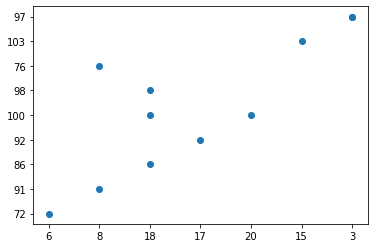

In [18]:
#Try to plot some values to see how they relate:

x=df3["Temperatura zraka0C"]
y=df3["Nasièenost s kisikom - sonda%"]
plt.scatter(x,y)
plt.show

In [16]:
#Check for dtypes:

df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 13.01.2014 to 22.12.2014
Data columns (total 89 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   Temperatura zraka0C                                        11 non-null     object
 1   Temperatura vode0C                                         11 non-null     object
 2   pH-                                                        11 non-null     object
 3   Elektrièna prevodnost (25 0C)?S/cm                         11 non-null     object
 4   Kisik sondamg O2/l                                         11 non-null     object
 5   Nasièenost s kisikom - sonda%                              11 non-null     object
 6   Suspendirane snovi po suenjumg/l                          11 non-null     object
 7   KPK s KMnO4mg O2/l                                         11 non-null     object
 8   KPK s K2Cr

In [17]:
#Convert dtypes to int and float:

cols = df3.columns
df3[cols] = df3[cols].apply(pd.to_numeric, errors='coerce')
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 13.01.2014 to 22.12.2014
Data columns (total 89 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Temperatura zraka0C                                        11 non-null     int64  
 1   Temperatura vode0C                                         2 non-null      float64
 2   pH-                                                        3 non-null      float64
 3   Elektrièna prevodnost (25 0C)?S/cm                         11 non-null     int64  
 4   Kisik sondamg O2/l                                         1 non-null      float64
 5   Nasièenost s kisikom - sonda%                              11 non-null     int64  
 6   Suspendirane snovi po suenjumg/l                          11 non-null     int64  
 7   KPK s KMnO4mg O2/l                                         11 non-null     int64  
 8   

In [18]:
#See what we got:

df3

Parameter,Temperatura zraka0C,Temperatura vode0C,pH-,Elektrièna prevodnost (25 0C)?S/cm,Kisik sondamg O2/l,Nasièenost s kisikom - sonda%,Suspendirane snovi po suenjumg/l,KPK s KMnO4mg O2/l,KPK s K2Cr2O7mg O2/l,BPK5mg O2/l,...,Selen-filt.?g/l,Srebro-filt.?g/l,Svinec-filt.?g/l,Svinec-sed.mg/kg,Svinec-org. (mokra tea)?g/kg,Vanadij-filt.?g/l,ivo srebro-filt.?g/l,ivo srebro-sed.mg/kg,ivo srebro-org. (mokra tea)?g/kg,Titan-filt.?g/l
13.01.2014,6,NaN,NaN,303,NaN,72,0,0,0,0,...,NaN,NaN,NaN,0,0,NaN,NaN,0,0,NaN
27.02.2014,8,NaN,NaN,299,NaN,91,0,0,0,0,...,NaN,NaN,NaN,0,0,NaN,NaN,0,0,NaN
18.03.2014,18,10.0,NaN,324,NaN,86,0,0,0,0,...,NaN,NaN,NaN,0,0,NaN,NaN,0,0,NaN
14.04.2014,17,NaN,8.0,253,NaN,92,0,0,0,0,...,NaN,NaN,NaN,0,0,NaN,NaN,0,0,NaN
22.05.2014,20,NaN,NaN,246,NaN,100,0,0,0,0,...,NaN,NaN,NaN,0,0,NaN,NaN,0,0,NaN
17.06.2014,18,17.0,8.0,192,NaN,100,0,0,0,0,...,NaN,NaN,NaN,0,0,NaN,NaN,0,0,1.0
26.08.2014,18,NaN,8.0,261,NaN,98,0,0,0,0,...,NaN,NaN,NaN,0,0,NaN,NaN,0,0,NaN
24.09.2014,8,NaN,NaN,256,NaN,76,0,0,0,0,...,NaN,NaN,NaN,0,0,NaN,NaN,0,0,NaN
14.10.2014,15,NaN,NaN,304,10.0,103,0,0,0,0,...,NaN,NaN,NaN,0,0,NaN,NaN,0,0,NaN
24.11.2014,3,NaN,NaN,261,NaN,97,0,0,0,0,...,NaN,NaN,NaN,0,0,NaN,NaN,0,0,NaN


Converson messed up all values with "," as decimal separator....not good....try to find different solution.